In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-sales/book_sales.csv


# Time Series - a set of observations recorded over time
**Forecasting** is perhaps the most common application of machine learning in the real world. **Businesses** forecast product demand, **governments** forecast economic and population growth, **meteorologists** forecast the weather. The understanding of things to come is a pressing need across science, government, and industry (not to mention our personal lives!), and practitioners in these fields are increasingly applying machine learning to address this need.

Time series forecasting is a broad field with a long history. This course focuses on the **application of modern machine learning methods** to time series data with the **goal of producing the most accurate predictions**. The lessons in this course were inspired by **winning solutions from past Kaggle forecasting competitions** but will be applicable whenever accurate forecasts are a priority.

know how to:

* engineer features to model the major time series components (trends, seasons, and cycles),
* visualize time series with many kinds of time series plots,
* create forecasting hybrids that combine the strengths of complementary models, and
* adapt machine learning methods to a variety of forecasting tasks.


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/books-sales/book_sales.csv",
                index_col='Date',
                parse_dates=['Date'],
                ).drop('Paperback', axis=1)

In [3]:
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


## Forecasting Model using Linear Regression

The equation that represents linear regression:
target = weight_1 * feature_1 + weight_2 * feature_2 + bias
* **target** = the value to forecast.
* **feature_1** and **feature_2** = input features (variables) used to make predictions.
* **weight_1** and **weight_2**: Are the **coefficients** that represent the **importance** (or weight) given to each feature during the prediction process.
* **bias**: Is a constant term (often denoted as 'b' or 'intercept') that is added to the weighted sum of features. It helps to shift the regression line up or down and is independent of the input features.
* Two methods: **Time-step** features and **Lag** features

**Time-step features (Time Dependence Model)**
* time dummy features: Count off time steps in the series from beginning to end
* Lag features

In [4]:
# Time step features - Directly use the time-index column, marking each time step
import numpy as np

df['time_step'] = np.arange(len(df.index))
df

,Hardcover,time_step
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4
2000-04-06,168,5
2000-04-07,170,6
2000-04-08,145,7
2000-04-09,184,8


Linear rgression with the time dummy produces the model:   
`target = weight * **time** + bias`   
The time dummy then lets us fit curves to time series in a time plot - Time forms the x-axis

plot the time data

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/2502754448.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


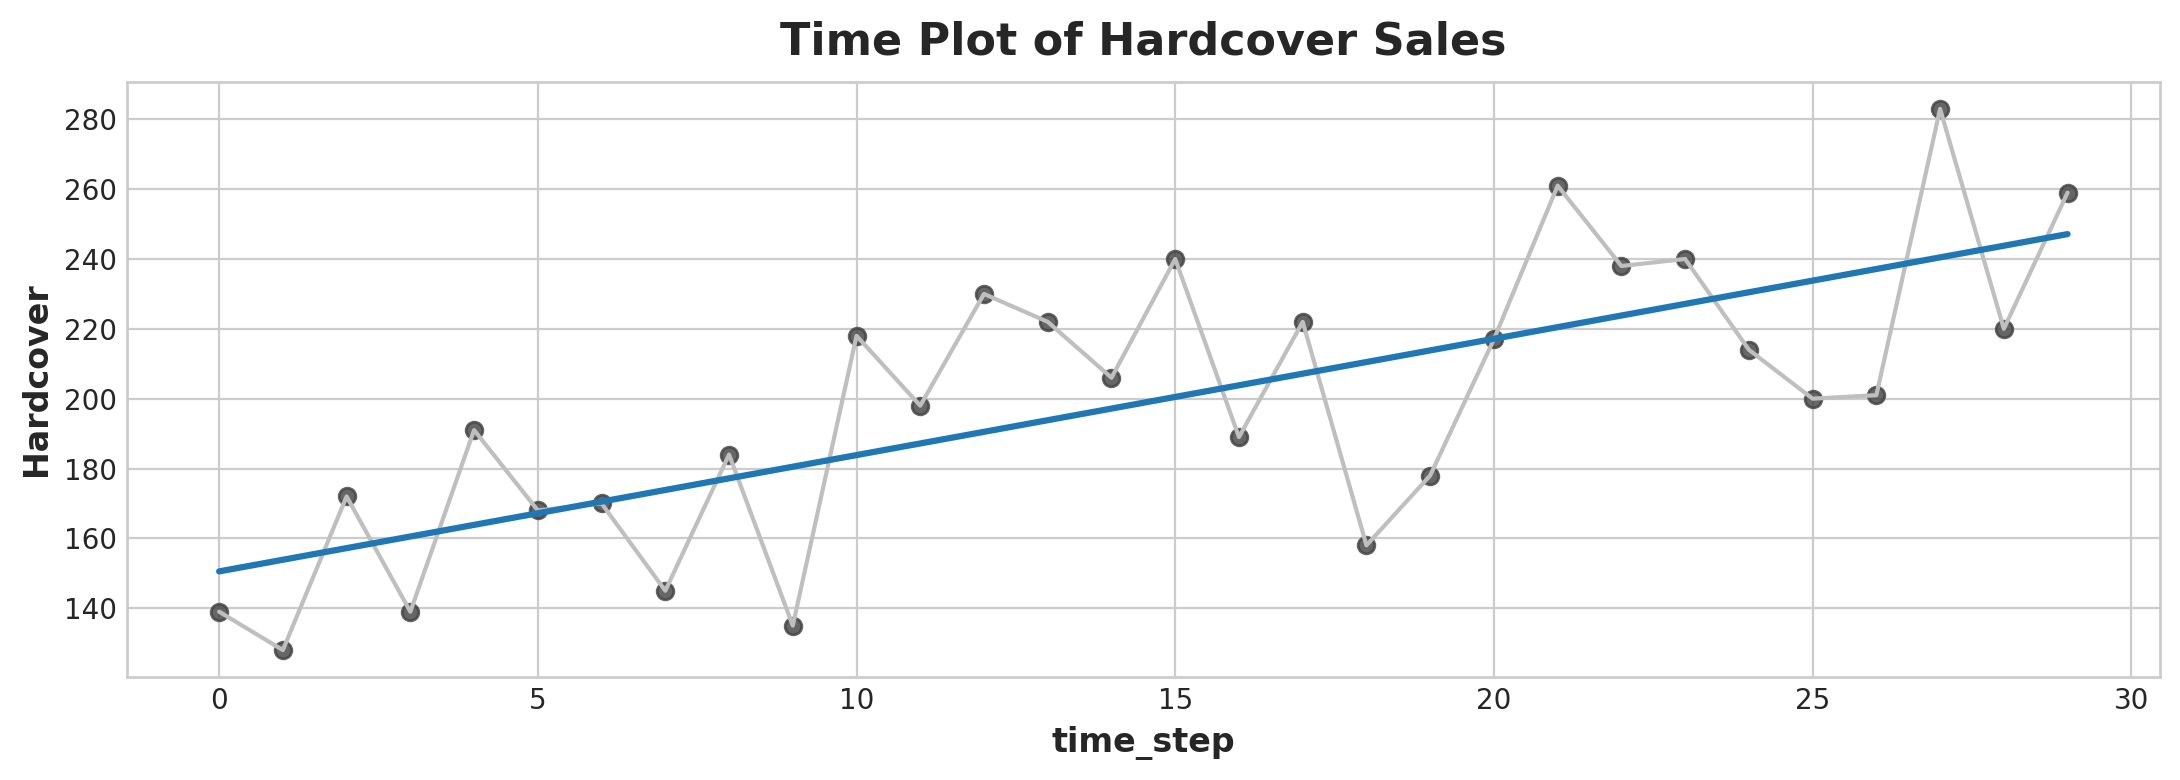

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time_step', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='time_step', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

**Lag features (Serial Dependence)**    
Shift the time step by N to make it looks like it occured later in time. (i.g. 1-step lag ..... multiple-step lag)

In [6]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover','Lag_1']) # rearrange columns w/o time_step
df

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0
2000-04-06,168,191.0
2000-04-07,170,168.0
2000-04-08,145,170.0
2000-04-09,184,145.0


Linear rgression with a lag feature produces the model:   
`target = weight * **lag** + bias`    
**So lag features let us fit curves to lag plots where each observation in a series is plotted agaginst the previous observation**

Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

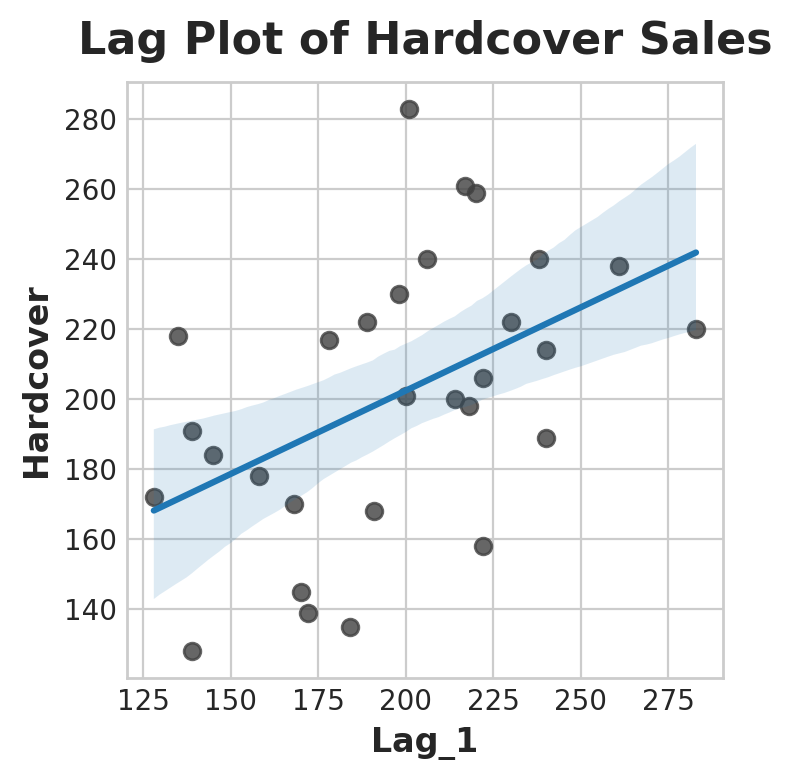

In [7]:
# plot it and check for patterns of correlation between one day
# and the previous data - slope of the linear regression
# Serial Dependence

fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', 
                 data=df, 
                 scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')


You can see from the lag plot that **sales on one day** (Hardcover) are **correlated** with **sales from the previous day** (Lag_1). When you see a relationship like this, you know a lag feature will be useful.

More generally, lag features let you model **serial dependence**. A time series has serial dependence **when an observation can be predicted from previous observations**. In Hardcover Sales, we can predict that high sales on one day usually mean high sales the next day.

> Adapting machine learning algorithms to time series problems is largely about feature engineering with the time index and lags. For most of the course, we use linear regression for its simplicity, but these features will be useful whichever algorithm you choose for your forecasting task.

### Tunnel Traffic (Baregg Tunnel in Switzerland)     
Tunnel Traffic is a time series describing the number of vehicles traveling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005. In this example, we'll get some practice applying linear regression to time-step features and lag features

In [16]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index("Day")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
#print(tunnel.index) # before, the index is DatetimeIndex
tunnel = tunnel.to_period()
#print(tunnel.index) # after, now the index is PeriodIndex

tunnel.head()

DatetimeIndex(['2003-11-01', '2003-11-02', '2003-11-03', '2003-11-04',
               '2003-11-05', '2003-11-06', '2003-11-07', '2003-11-08',
               '2003-11-09', '2003-11-10',
               ...
               '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
               '2005-11-11', '2005-11-12', '2005-11-13', '2005-11-14',
               '2005-11-15', '2005-11-16'],
              dtype='datetime64[ns]', name='Day', length=747, freq=None)
PeriodIndex(['2003-11-01', '2003-11-02', '2003-11-03', '2003-11-04',
             '2003-11-05', '2003-11-06', '2003-11-07', '2003-11-08',
             '2003-11-09', '2003-11-10',
             ...
             '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
             '2005-11-11', '2005-11-12', '2005-11-13', '2005-11-14',
             '2005-11-15', '2005-11-16'],
            dtype='period[D]', name='Day', length=747)


,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [17]:
# Time-step feature
# no missing dates, so create a time dummy

df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [19]:
# Fit a linear regression model from scikit-learn
# standard procedures for fitting

from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']] # features (time dummy), return df
y = df.loc[:, 'NumVehicles'] # target, return Series

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index
# as the training data
y_pred = pd.Series(model.predict(X), index=X.index)


Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

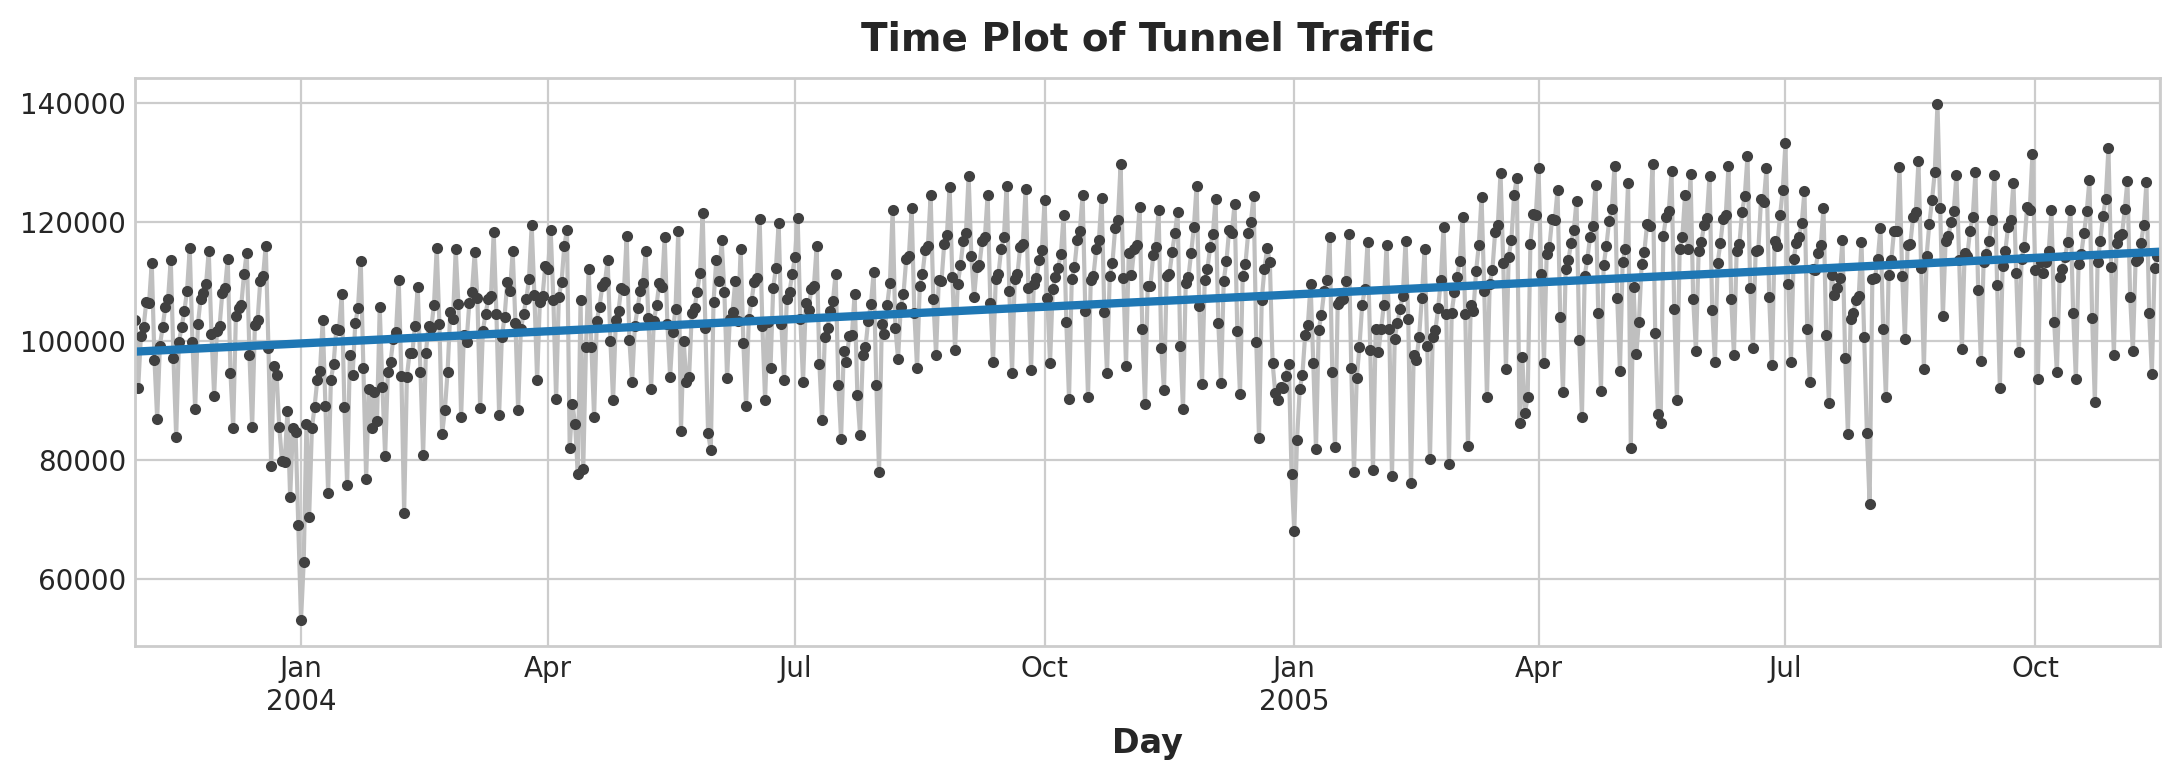

In [28]:
# plot the data
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)  # blue linear regression line fitted
ax.set_title('Time Plot of Tunnel Traffic')

In [36]:
# lag features - Series dependence
# Pandas provides a simple method to lag a series, the shift method.

df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


When creating lag features, we need to decide what to do with the missing values produced. Filling them in is one option, maybe with 0.0 or "backfilling" with the first known value. Instead, we'll just drop the missing values, making sure to also drop values in the target from corresponding dates.

In [56]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']] # create a feature set (df)
X.dropna(inplace=True) # drop missing values - simple choice in this project
y = df.loc[:, 'NumVehicles']  # create a target y (series)
y, X = y.align(X, join='inner') # drop corresponding values in target y
"""
This line ensures that the target variable y and the feature set X 
have the same rows. It aligns the two data structures based on their 
indices, and join='inner' means it keeps only the rows that are 
common in both y and X. This step is necessary to make sure the target 
variable and feature set have corresponding values for training the model.
"""

# model definition, train(fit) and predict with training data
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index) # ensure the result series has the same index

The lag plot shows us how well we were able to fit the relationship between the number of vehicles one day and the number the previous day.

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

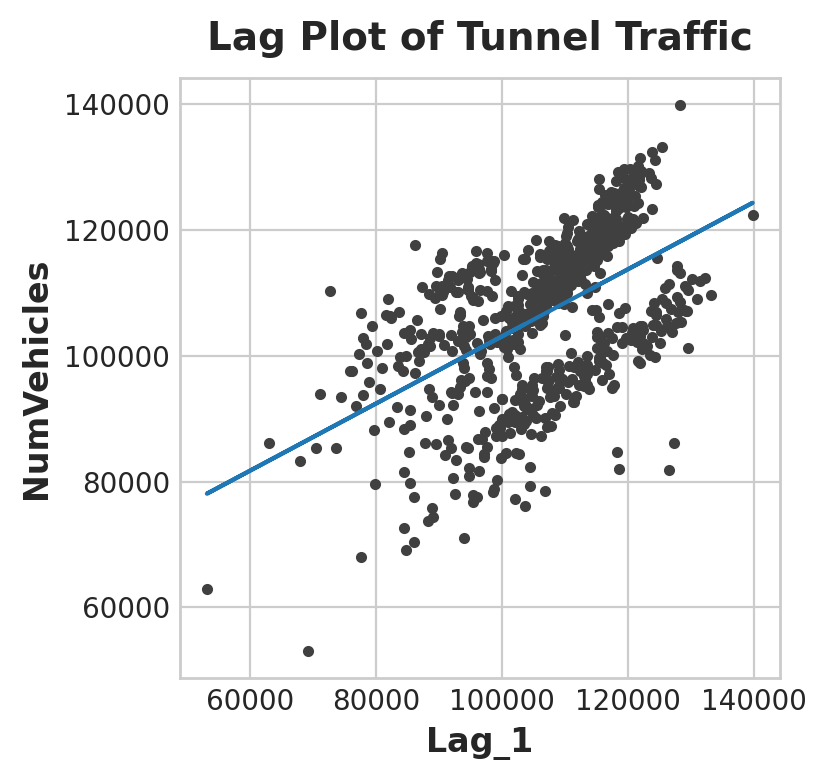

In [73]:
# plot the number of vehicles one day and the previous day

fig, ax = plt.subplots()  # A figure with a set of axes(ax)
ax.plot(X['Lag_1'], y, '.', color='0.25') # scatter plot with dot(.) - (Lag_1, y)
ax.plot(X['Lag_1'], y_pred)  # draw a fitted line for prediction  - (Lag_1, y_pred)

ax.set_aspect('equal') # make the figure square
ax.set_ylabel('NumVehicles') # y label
ax.set_xlabel('Lag_1') # x label
ax.set_title("Lag Plot of Tunnel Traffic") # plot title

What does this prediction from a lag feature mean about how well we can predict the series across time? The following time plot shows us how our forecasts now respond to the behavior of the series in the recent past.

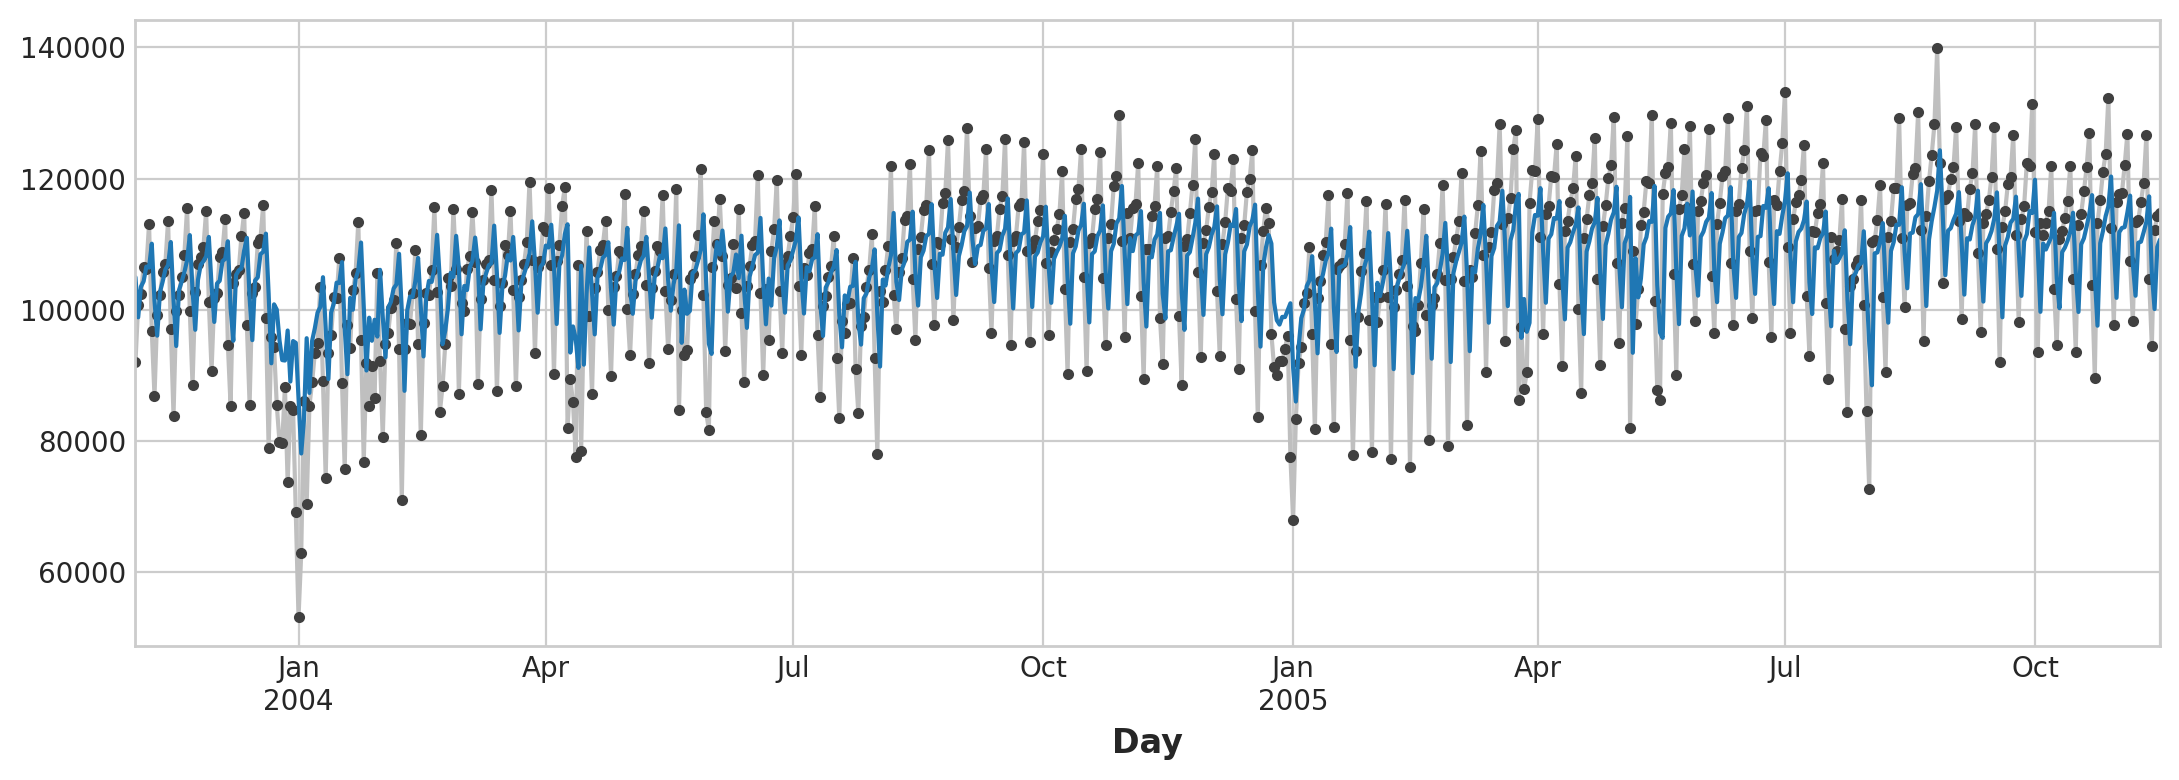

In [79]:
ax = y.plot(**plot_params)
ax = y_pred.plot()   # draw default line plot with the predicted vales onto the same axes.
# the blue line data points are predicted values.

The best time series models usually include **combination** of 
* **time-step** features
* **lag** features